# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [13]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [14]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [15]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

#### Question 2. Create a summary table

In [16]:
#function

In [17]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: 
The most clear explanation is that the range of values is larger. The possible range for GRE is 200 to 800 (or 600 points), whereas the range for GPA is limited to a range of 0 to 4 (or 4 points). So even if the normalized variation of the underlying measures is the same, the wider range in GRE would give a higher standard deviation.


#### Question 4. Drop data points with missing data


In [25]:
data = df_raw.dropna()
data.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Before the DataFrame.count() method revealed that not all columns had the same amount of observations. After re-running that method on the new data frame (with the dropped data points), the .count() method reveals that all columns have the same observations. 

Based on the 397 rows without missing data and the initial output of data.count, it appears that 3 rows were dropped. 

#### Question 6. Create box plots for GRE and GPA

In [34]:
data.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


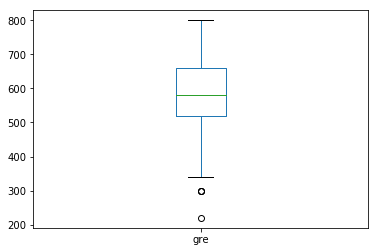

In [36]:
#boxplot 1
data['gre'].plot(kind='box')

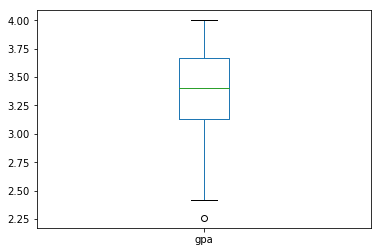

In [33]:
#boxplot 2 
data['gpa'].plot(kind='box');

#### Question 7. What do this plots show?

Answer: 
Generic boxplot: Shows the distribution of the data in the 4 available quartiles (25,50,75,100). Besides giving you the mean of the data (green line) it also shows how concentrated the data is in each of the quartiles. 
The highest concentration of data is between the 25th and 75th percentile as evident by the smaller range covered by the box in the box plot relative to the full range. This is expected in a standard distribution graph. It also seems like the data exhibits negative skewness given that the mean isshifter towards the upper end of the range. The gpa data appears to be slightly more negatively skewed. 

#### Question 8. Describe each distribution 

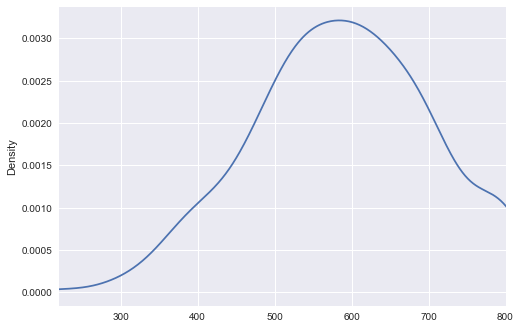

In [60]:
# plot the distribution of each variable 
#multiple ways to plot like 
data.gre.plot(kind='density', xlim=(data.gre.min(), 800))


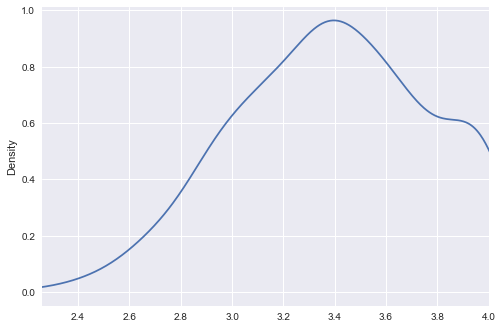

In [59]:
data.gpa.plot(kind='density', xlim=(data.gpa.min(), data.gpa.max()))

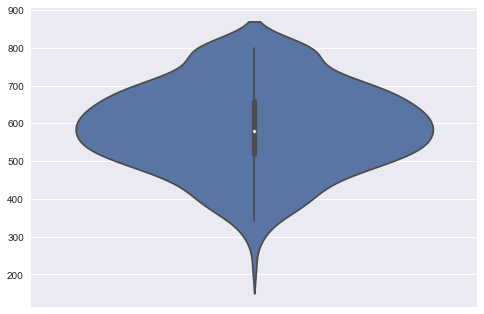

In [62]:
#or plot using seaborn (didn't bother with histograms since they are more simplistic)
import seaborn as sns
sns.violinplot(y=['gre'], data=data);

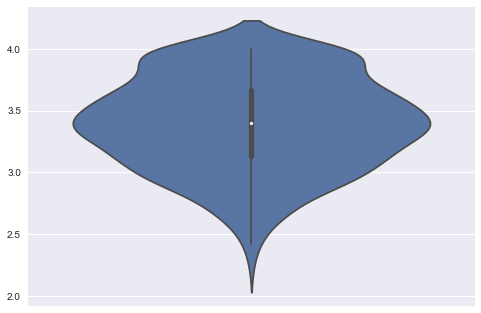

In [63]:
sns.violinplot(y=['gpa'], data=data);

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [66]:
import scipy as sp
sp.stats.normaltest(data.gre)

NormaltestResult(statistic=3.8179829306094248, pvalue=0.14822980613776679)

In [67]:
sp.stats.normaltest(data.gpa)

NormaltestResult(statistic=13.07987556091647, pvalue=0.0014445783772290991)

Answer: Based on the normaltest output, it appears that the GRE data is normally distributed but the gpa data is not. The normaltest method posits the null hypothesis that the data is normally distributed. A small p-value means that it is unlikely that the data comes from a normal distribution. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

The GPA distribution would need to be corrected. It seems like the data is slightly non-linear. Taking a log of the data would correct for this skewness. 

#### Question 11. Which of our variables are potentially colinear? 

In [68]:
# create a correlation matrix for the data
data.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


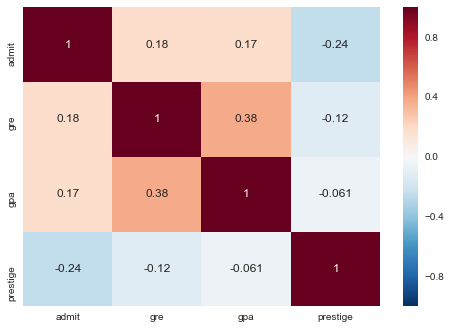

In [69]:
sns.heatmap(data.corr(), annot=True)

#### Question 12. What did you find?

Answer: The dependent variable (admit) is positively correlated to both gre and gpa and negatively correlated to prestige. Therefore, a candidate with high gpa/gre is more likely to be admitted, and a candidate from a less prestigious school (higher prestige score) is less likely to get accepted. The most meaningful correlation is prestige, and from this a good hypothesis would be that the prestige of your institution is the most meaningful factor for acceptance.

Also, the strongest correlation is between the GPA and GRE (38%). This is not surprising since students with high GPA's are more likely to score higher in the GRE's. There also appears to be a very small correlation between prestige and gpa. Therefore, the level of prestige doesn't seem to be related to the gpa attained in each institution.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: The purpose of this excercise would be to determine if these factors are meaningful when used together (through a multi-variable logistic regression) and if we can determine causality.

The first step would be to run a logistic regression on all the factors. This is similar to a regular regression but the main difference is that the output is true or false instead of a range of values. However, we must first convert the prestige data into dummy variables. Given that there are 4 possible values for prestige, you can represent all outcomes using 3 dummies. A 4th dummy is unecessary and has the potential to introduce multicolinearity. After running the regression we can determine if all independent variables are statistically significant. If not, we should remove one of the variables and re-run the regression.

Causality is a bit harder to determine since you would need to hold certain external factors constant. For example, external factors that may affect the admitance rate may be undergraduate major, field of work, number of years of professional experience, quality of recommendation essays, prestige of major within school. Once you hold all possible factors constant you can at that point determine if in fact a higher gre score leads to a higher chance of being admitted. It could be that another factor leads to both a higher gpa score and higher chance of admitance.

#### Question 14. What is your hypothesis? 

Answer: My hypothesis is that a higher chance of being admitted is positively correlated to gpa, gre and prestige of school. The most meaningful factor in my opinion would be prestige of school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data